In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

from sklearn.cluster import KMeans, MeanShift, AgglomerativeClustering

In [ ]:
#  Load Dataset
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)


In [ ]:
#  Helper Functions
def evaluate_clusters(X, labels):
    return {
        "Silhouette": silhouette_score(X, labels),
        "Calinski-Harabasz": calinski_harabasz_score(X, labels),
        "Davies-Bouldin": davies_bouldin_score(X, labels)
    }

def apply_pca(X, n_components=2):
    pca = PCA(n_components=n_components)
    return pca.fit_transform(X)

In [ ]:
#  Preprocessing Techniques
scalers = {
    "No Processing": lambda x: x,
    "Normalization": lambda x: MinMaxScaler().fit_transform(x),
    "Transformation": lambda x: np.log1p(x),
    "PCA": lambda x: apply_pca(x),
    "T+N": lambda x: MinMaxScaler().fit_transform(np.log1p(x)),
    "T+N+PCA": lambda x: apply_pca(MinMaxScaler().fit_transform(np.log1p(x)))
}

In [ ]:
# Clustering Algorithms
clustering_algorithms = {
    "KMeans": lambda k: KMeans(n_clusters=k, random_state=42),
    "Hierarchical": lambda k: AgglomerativeClustering(n_clusters=k),
    "MeanShift": lambda _: MeanShift()  # Doesn't require n_clusters
}

In [ ]:
#  Run All Configurations
results = []

for method_name, process in scalers.items():
    X_proc = process(X)
    for algo_name, cluster_algo in clustering_algorithms.items():
        for k in [3, 4, 5] if algo_name != "MeanShift" else [None]:
            model = cluster_algo(k) if k else cluster_algo(None)
            labels = model.fit_predict(X_proc)
            scores = evaluate_clusters(X_proc, labels)
            scores.update({
                "Preprocessing": method_name,
                "Algorithm": algo_name,
                "Clusters": k if k else "Auto"
            })
            results.append(scores)


In [ ]:
#  Convert to DataFrame
results_df = pd.DataFrame(results)
results_df = results_df[["Algorithm", "Preprocessing", "Clusters", "Silhouette", "Calinski-Harabasz", "Davies-Bouldin"]]
display(results_df)

,Algorithm,Preprocessing,Clusters,Silhouette,Calinski-Harabasz,Davies-Bouldin
0,KMeans,No Processing,3,0.551192,561.593732,0.666039
1,KMeans,No Processing,4,0.497643,529.529095,0.754140
2,KMeans,No Processing,5,0.493080,495.243414,0.819384
3,Hierarchical,No Processing,3,0.554324,558.058041,0.656256
4,Hierarchical,No Processing,4,0.488967,515.078906,0.795264
5,Hierarchical,No Processing,5,0.484383,488.484904,0.820417
6,MeanShift,No Processing,Auto,0.685788,509.703427,0.388552
7,KMeans,Normalization,3,0.482929,351.295064,0.786733
8,KMeans,Normalization,4,0.443933,313.892925,0.908155
9,KMeans,Normalization,5,0.422704,263.173325,0.992856


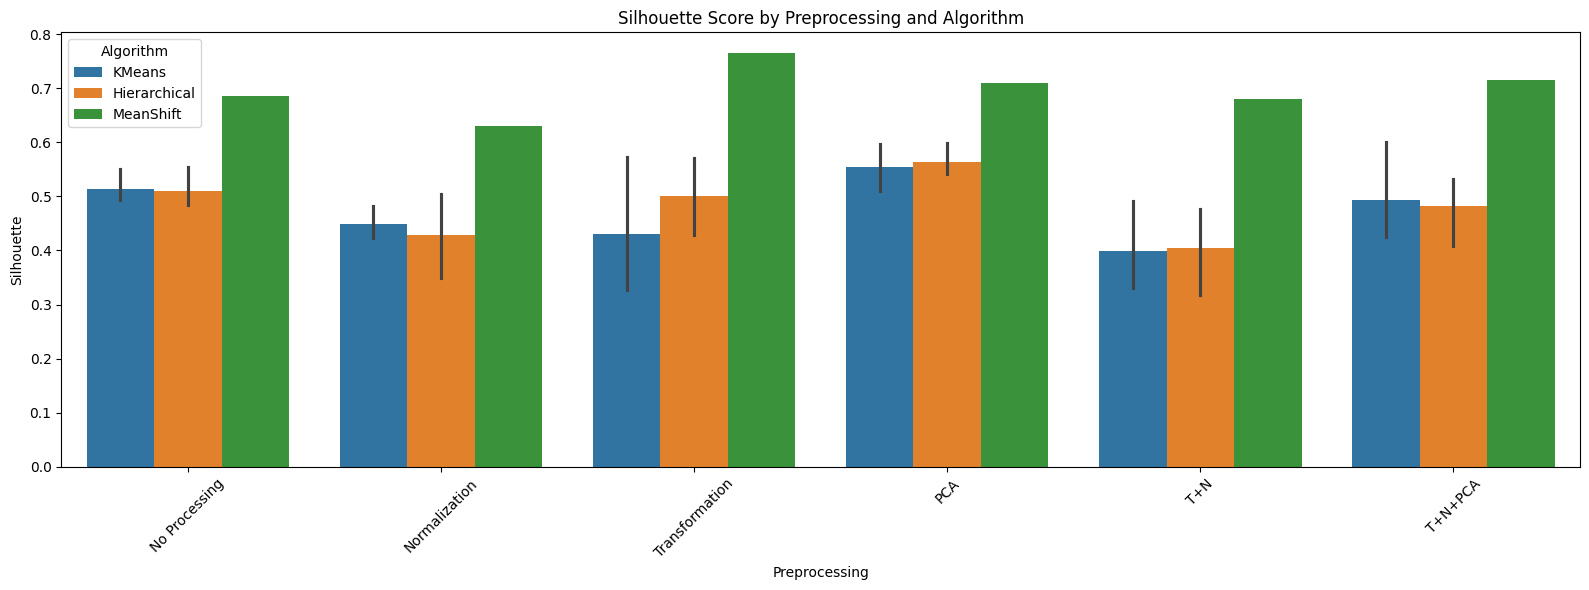

In [ ]:
#Bar plot
plt.figure(figsize=(16, 6))
sns.barplot(data=results_df, x='Preprocessing', y='Silhouette', hue='Algorithm')
plt.title("Silhouette Score by Preprocessing and Algorithm")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


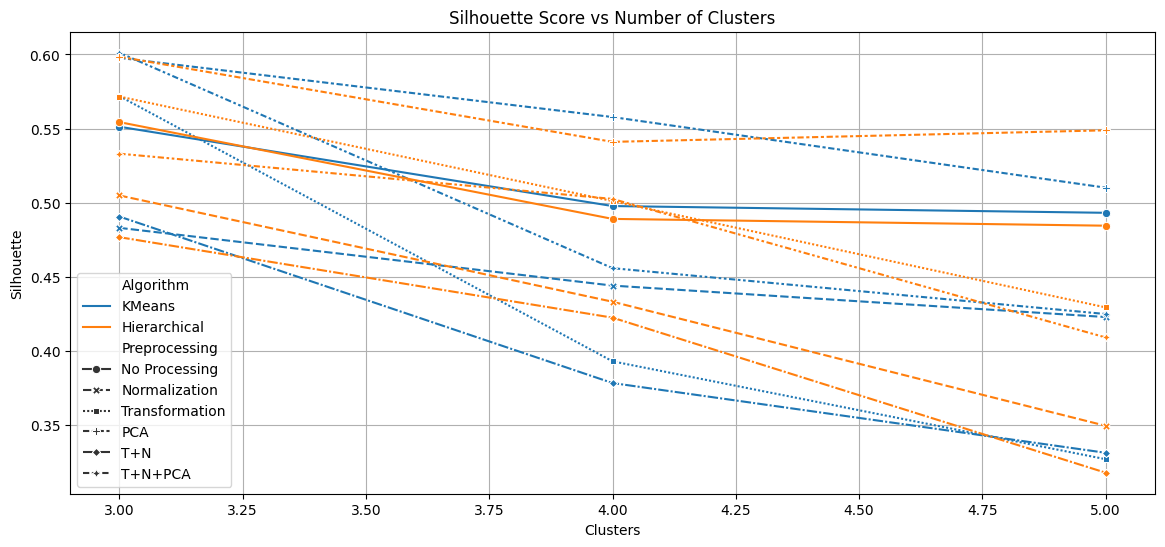

In [ ]:
#line plot
subset = results_df[results_df['Algorithm'].isin(['KMeans', 'Hierarchical'])]
subset = subset[subset['Clusters'] != "Auto"]

plt.figure(figsize=(14, 6))
sns.lineplot(data=subset, x='Clusters', y='Silhouette', hue='Algorithm', style='Preprocessing', markers=True)
plt.title("Silhouette Score vs Number of Clusters")
plt.grid(True)
plt.show()


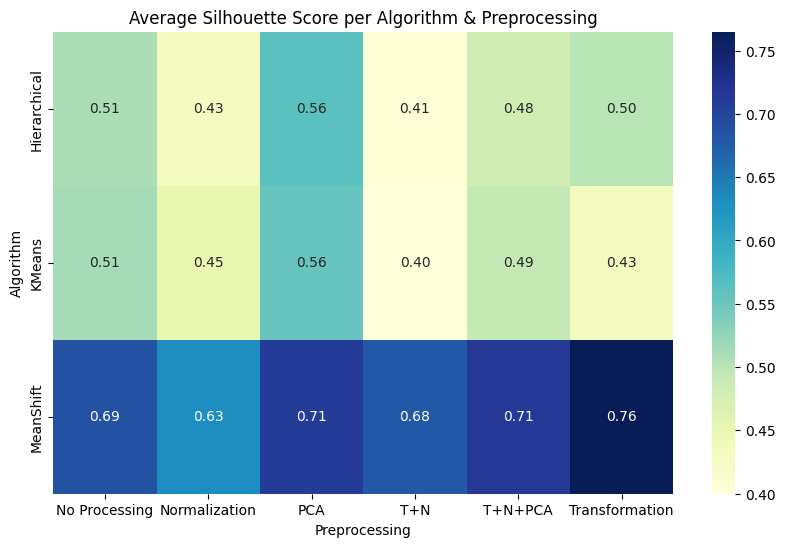

In [ ]:
#heatmap
pivot_df = results_df.groupby(['Algorithm', 'Preprocessing'])['Silhouette'].mean().unstack()
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_df, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Average Silhouette Score per Algorithm & Preprocessing")
plt.ylabel("Algorithm")
plt.xlabel("Preprocessing")
plt.show()
